In [2]:
#from scipy import stats
#import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Già ho il file pulito (Analisi "Confronto quotidiano tra casi positivi e decessi suddiviso per zone", dove ho esportato il nuovo csv a seconda delle esigenze

In [ ]:
%cd 'Progetto Covid Gruppo Horror'/

%ls

In [9]:
#importazione del file pulito
df_regioni=pd.read_csv("covid19_region_python_w_daily_deaths.csv", sep=",")

In [12]:
df_regioni.head()

,Country,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,Ripartizioni geografiche,Daily_Deaths
Date,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,Abruzzo,0,0,0,0,0,0,0,0,0,Sud,0.0
2020-02-24 18:00:00,ITA,Basilicata,0,0,0,0,0,0,0,0,0,Sud,0.0
2020-02-24 18:00:00,ITA,Calabria,0,0,0,0,0,0,0,0,0,Sud,0.0
2020-02-24 18:00:00,ITA,Campania,0,0,0,0,0,0,0,0,0,Sud,0.0
2020-02-24 18:00:00,ITA,Emilia-Romagna,10,2,12,6,18,18,0,0,18,Nord-est,0.0


In [10]:
#conversione della data
df_regioni['Date'] = pd.to_datetime(df_regioni['Date'])

In [11]:
#è necessario mettere l'indice per fare il grafico
df_regioni.set_index("Date", inplace=True)

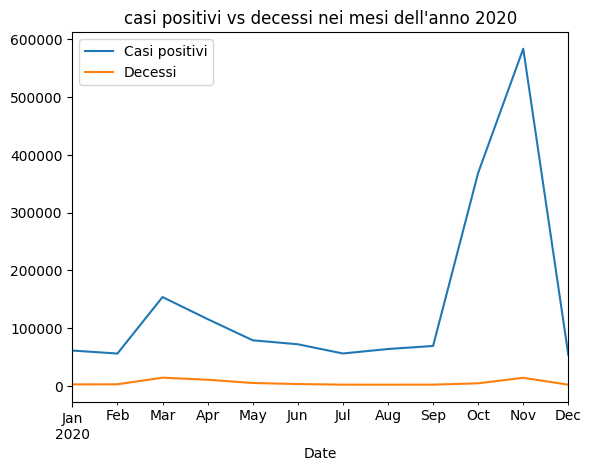

In [15]:
#andamento dei nuovi casi positivi nei mesi
andamento_casi_anno = df_regioni.resample("M")["NewPositiveCases"].sum().plot(kind= "line")
andamento_morti_anno = df_regioni.resample("M")["Daily_Deaths"].sum().plot(kind= "line")
plt.title("casi positivi vs decessi nei mesi dell'anno 2020")
plt.legend(["Casi positivi", "Decessi"])

Riflettendo su variabili che indicano giorno per giorno la quantità di decessi e casi positivi, i decessi anche se presenti, sono (ovviamente), più bassi rispetto ai casi di positività al covid. Si considera in via generale come però le due variabili si muovono in maniera diversa nel tempo: sembra che i decessi (seppur l'impatto è presente) sono più stabili rispetto a come si muove la variabile di positività al covid. Aumentano entrambe nel picco, ma i decessi (nel tempo) in maniera più "costante", mentre i nuovi casi positivi hanno un picco rispetto il resto del tempo che è di gran lunga più alto